# Compare Mergers

There seems to be a problem merging the different modules that particularly affects the short bands.  This can be seen in the ModuleMERGEDCatalogCrossmatch positional matches.

Goal here is to figure out if any of the reprojection approaches or realignment approaches fixed the problem


Corresponding CARTA snippet is f212n_pipeline_merged


See also EvluateOffsetFrameProblem

In [1]:
from astropy.io import fits

In [2]:
%matplotlib inline
import pylab as pl

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [5]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [6]:
suffixes = ['-reproject_i2d.fits', '_i2d.fits', '_realigned-to-refcat.fits']
fns = [f'F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged{suffix}' for suffix in suffixes]
fhs = [fits.open(fn) for fn in fns]
#fh1 = fits.open('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged-reproject_i2d.fits')
#fh2 = fits.open('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits')
#fh3 = fits.open('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_realigned-to-refcat.fits')
fh1, fh2, fh3 = fhs

In [7]:
import regions
from astropy import wcs
from astropy import visualization
from astropy.visualization import simple_norm

In [8]:
regs = regions.Regions.read('regions_/detectoroverlap_problemzone.reg')
reg = regs[0]

(slice(5814, 6064, None), slice(2488, 2757, None)) (250, 269)


Set DATE-AVG to '2022-08-28T02:01:42.926' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.693175 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526785127.355 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(slice(2149, 2420, None), slice(5666, 5919, None)) (271, 253)


Set OBSGEO-B to   -20.693175 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526785127.355 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(slice(2149, 2419, None), slice(5666, 5919, None)) (270, 253)


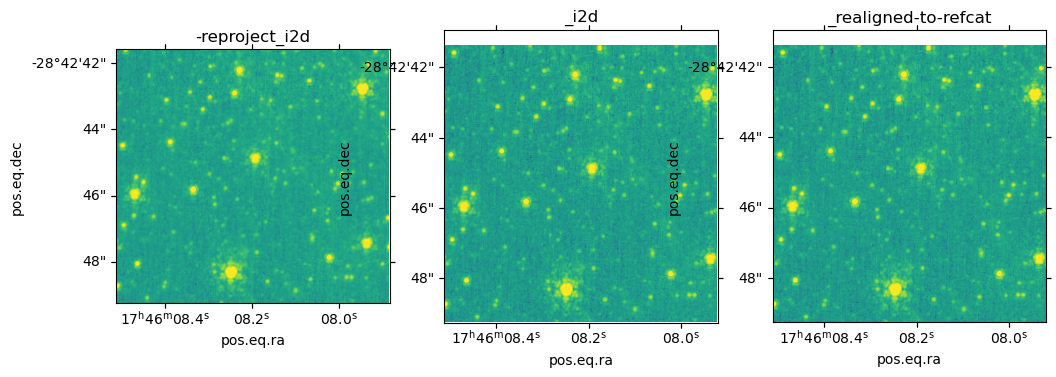

In [9]:
fig = pl.figure(figsize=(12,4))
ww1 = wcs.WCS(fh1['SCI'].header)
preg1 = reg.to_pixel(ww1)
slices1, _ = preg1.to_mask().get_overlap_slices(fh1['SCI'].data.shape)

for ii, (fn, fh) in enumerate(zip(fns, fhs)):
    ww = wcs.WCS(fh['SCI'].header)
    preg = reg.to_pixel(ww)
    slices, _ = preg.to_mask().get_overlap_slices(fh['SCI'].data.shape)
    cutout = fh['SCI'].data[slices]
    ax = pl.subplot(1, 3, ii+1, projection=ww1[slices1])
    ax.imshow(cutout, norm=simple_norm(cutout, max_percent=99.5, stretch='log'), origin='lower',
              transform=ax.get_transform(ww[slices]))
    ax.set_title(fn.split("merged")[-1].split(".")[0])
    print(slices, cutout.shape)

## Conclusion:

merge_a_plus_b, defined in align_to_catalogs, works.

The webb pipeline version simply doesn't.